# ETL
##### Aquí haremos el proceso de extraer, transformar y cargar los datos:

# Steam Games



In [43]:
# Descomprimimos, leemos y convertimos en dataframe al archivo steam_games
import gzip
import json 
import pandas as pd 

data = []

with gzip.open('steam_games.json.gz', 'rb') as d: # Usamos el modulo gzip 
    for line in d:
        data.append(json.loads(line)) # Lo cargamos dentro de un diccionario
games = pd.DataFrame(data) # Con Pandas lo convertimos en dataframe 
d.close()

In [44]:
games # Vemos que tiene muchos datos vacíos, los eliminamos


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


In [45]:
games = games.dropna(how = 'all') 
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 3.4+ MB


In [47]:
# Partiendo de la base de que cada video juego tiene un ID único, eliminaremos todas las filas que tengan ids duplicados
games.drop_duplicates(subset= 'id', keep= 'first', inplace= True)
# Existían dos duplicados, paso de 135 a 133

C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\2654609184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games.drop_duplicates(subset= 'id', keep= 'first', inplace= True)


In [48]:
games['id']

88310     761140
88311     643980
88312     670290
88313     767400
88314     773570
           ...  
120440    773640
120441    733530
120442    610660
120443    658870
120444    681550
Name: id, Length: 32133, dtype: object

In [49]:
games['publisher']


88310            Kotoshiro
88311     Making Fun, Inc.
88312         Poolians.com
88313                 彼岸领域
88314                  NaN
                ...       
120440     Ghost_RUS Games
120441              Sacada
120442        Laush Studio
120443            SIXNAILS
120444                 NaN
Name: publisher, Length: 32133, dtype: object

In [50]:
games['developer']

88310                    Kotoshiro
88311             Secret Level SRL
88312                 Poolians.com
88313                         彼岸领域
88314                          NaN
                    ...           
120440          Nikita "Ghost_RUS"
120441                      Sacada
120442    Laush Dmitriy Sergeevich
120443               xropi,stev3ns
120444                         NaN
Name: developer, Length: 32133, dtype: object

In [51]:
#Estas dos culumnas son bastantes parecidas a pesar que publisher y developer no son lo mismo, mas podemos usar la info de una para completar la otra
nulos_developer = games['developer'].isnull().sum()
nulos_publisher = games['publisher'].isnull().sum()
print (nulos_developer, nulos_publisher)

3299 8052


In [52]:
#Rellenamos developer con publisher
games["developer"].fillna(games["publisher"], inplace=True)

C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\2339542519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["developer"].fillna(games["publisher"], inplace=True)


In [53]:
nulos_developer = games['developer'].isnull().sum()
print(nulos_developer)

3234


In [12]:
#Pasamos de 3299 vacios en developer a 3234, ahora eliminemos la columna publisher
games.drop('publisher',axis=1, inplace= True)

C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\3419492113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games.drop('publisher',axis=1, inplace= True)


In [54]:
games.dropna(subset=["developer"], inplace=True)
games.info() # Generamos información general

<class 'pandas.core.frame.DataFrame'>
Index: 28899 entries, 88310 to 120443
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24081 non-null  object
 1   genres        28733 non-null  object
 2   app_name      28899 non-null  object
 3   title         28899 non-null  object
 4   url           28899 non-null  object
 5   release_date  28881 non-null  object
 6   tags          28761 non-null  object
 7   reviews_url   28899 non-null  object
 8   specs         28613 non-null  object
 9   price         27662 non-null  object
 10  early_access  28899 non-null  object
 11  id            28899 non-null  object
 12  developer     28899 non-null  object
dtypes: object(13)
memory usage: 3.1+ MB


C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\2072664700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games.dropna(subset=["developer"], inplace=True)


In [55]:
games['genres']

88310         [Action, Casual, Indie, Simulation, Strategy]
88311                  [Free to Play, Indie, RPG, Strategy]
88312     [Casual, Free to Play, Indie, Simulation, Sports]
88313                           [Action, Adventure, Casual]
88315                       [Action, Adventure, Simulation]
                                ...                        
120439                   [Action, Adventure, Casual, Indie]
120440                [Casual, Indie, Simulation, Strategy]
120441                            [Casual, Indie, Strategy]
120442                          [Indie, Racing, Simulation]
120443                                      [Casual, Indie]
Name: genres, Length: 28899, dtype: object

In [15]:
games['tags']

88310         [Strategy, Action, Indie, Casual, Simulation]
88311     [Free to Play, Strategy, Indie, RPG, Card Game...
88312     [Free to Play, Simulation, Sports, Casual, Ind...
88313                           [Action, Adventure, Casual]
88315     [Action, Adventure, Simulation, FPS, Shooter, ...
                                ...                        
120439          [Action, Indie, Casual, Violent, Adventure]
120440                [Strategy, Indie, Casual, Simulation]
120441                            [Strategy, Indie, Casual]
120442                          [Indie, Simulation, Racing]
120443    [Indie, Casual, Puzzle, Singleplayer, Atmosphe...
Name: tags, Length: 28899, dtype: object

In [56]:
#es un proceso similar al caso de publisher y developer 
nulos_genre = games['genres'].isnull().sum()
nulos_tags = games['tags'].isnull().sum()
print(nulos_genre,nulos_tags)

166 138


In [17]:
#rellenamos con datos de tags la columna genres
#games['genres'].fillna(games['tags'],inplace= True)
#con este proceso pasamos de 166 a 114 nulos en genre

C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\2900072523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['genres'].fillna(games['tags'],inplace= True)


In [57]:
#vamos a eliminar la columna tags y las filas donde genres sigue con nulos 
games.drop('tags', axis=1, inplace=True)
games.dropna(subset = ['genres'], inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28733 entries, 88310 to 120443
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     23953 non-null  object
 1   genres        28733 non-null  object
 2   app_name      28733 non-null  object
 3   title         28733 non-null  object
 4   url           28733 non-null  object
 5   release_date  28715 non-null  object
 6   reviews_url   28733 non-null  object
 7   specs         28447 non-null  object
 8   price         27516 non-null  object
 9   early_access  28733 non-null  object
 10  id            28733 non-null  object
 11  developer     28733 non-null  object
dtypes: object(12)
memory usage: 2.8+ MB


C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\2996233423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games.drop('tags', axis=1, inplace=True)
C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\2996233423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games.dropna(subset = ['genres'], inplace=True)


In [58]:
#app_name y title es un caso similar a los anteriores
nulos_app_name = games['app_name'].isnull().sum()
nulos_title = games['title'].isnull().sum()
print(nulos_app_name, nulos_title,'increible')


0 0 increible


In [59]:
#no tienen valores nulos, increible. veremos si son similares realmente
total_filas = len(games)
iguales = (games['app_name'] == games['title']).sum()
similaridad = ((iguales / total_filas)*100)
print(similaridad)

98.11714753071381


In [60]:
#eliminamos 'app_name' porque brinda informacion redundante
games.drop('app_name', axis=1, inplace=True)

C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\4246735961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games.drop('app_name', axis=1, inplace=True)


In [61]:
#finalmente pedimos informacion general de nuestro df games, se redujo de 120 mil lineas a 28785
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28733 entries, 88310 to 120443
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     23953 non-null  object
 1   genres        28733 non-null  object
 2   title         28733 non-null  object
 3   url           28733 non-null  object
 4   release_date  28715 non-null  object
 5   reviews_url   28733 non-null  object
 6   specs         28447 non-null  object
 7   price         27516 non-null  object
 8   early_access  28733 non-null  object
 9   id            28733 non-null  object
 10  developer     28733 non-null  object
dtypes: object(11)
memory usage: 2.6+ MB


In [62]:
games['release_date']

88310     2018-01-04
88311     2018-01-04
88312     2017-07-24
88313     2017-12-07
88315     2018-01-04
             ...    
120439    2018-01-04
120440    2018-01-04
120441    2018-01-04
120442    2018-01-04
120443    2017-09-02
Name: release_date, Length: 28733, dtype: object

In [63]:
#de aca nos vamos a quedar solo con el año que es lo relevante
games['release'] = games['release_date'].str.extract(r'(\d{4})')
#borramos 'release_date'
games.drop('release_date',axis=1,inplace=True)
#mostramos la nueva columna
games['release']

C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\3983028430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['release'] = games['release_date'].str.extract(r'(\d{4})')
C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\3983028430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games.drop('release_date',axis=1,inplace=True)


88310     2018
88311     2018
88312     2017
88313     2017
88315     2018
          ... 
120439    2018
120440    2018
120441    2018
120442    2018
120443    2017
Name: release, Length: 28733, dtype: object

In [64]:
#contemos los nulos 
nulos_release = games['release'].isnull().sum()
print(nulos_release)

119


In [65]:
#Vamos a rellenar los espacios en blanco con la mediana 
#games['release'] = games['release'].str.strip() #eliminamos los carpacteres especiales y espacios que puede generar conflicto
games['release'] = pd.to_numeric(games['release'], errors='coerce') #convertimos de str a int la columma release 
mediana_release = games['release'].median() #guardamos la mediana 
games['release'].fillna(mediana_release, inplace=True)

C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\2784983827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['release'] = pd.to_numeric(games['release'], errors='coerce') #convertimos de str a int la columma release
C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\2784983827.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform t

In [66]:
#verificamos 
nulos_release = games['release'].isnull().sum()
print(nulos_release, 'increible')

0 increible


In [67]:
games.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28733 entries, 88310 to 120443
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     23953 non-null  object 
 1   genres        28733 non-null  object 
 2   title         28733 non-null  object 
 3   url           28733 non-null  object 
 4   reviews_url   28733 non-null  object 
 5   specs         28447 non-null  object 
 6   price         27516 non-null  object 
 7   early_access  28733 non-null  object 
 8   id            28733 non-null  object 
 9   developer     28733 non-null  object 
 10  release       28733 non-null  float64
dtypes: float64(1), object(10)
memory usage: 2.6+ MB


In [68]:
#La columna price vamos a revisar si tiene valores nulos y vamos a estandarizar el tipo de dato
nulos_price = games['price'].isnull().sum()
print(nulos_price)

1217


In [69]:
#convirtamos la columna a float para calcular el promedio 
games['price'] = pd.to_numeric(games['price'], errors = 'coerce')
#Y los precios que sean Free o free, usaremos de indicador la F para convertirlos a 0.0
games.loc[games['price'].astype(str).str.contains('[fF]','price')] = 0.0

C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\2512064342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['price'] = pd.to_numeric(games['price'], errors = 'coerce')


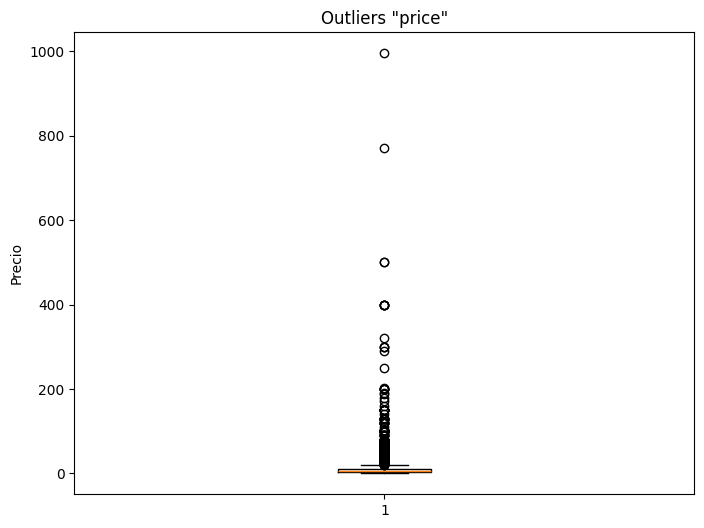

In [70]:
import matplotlib.pyplot as plt
#Excluyeré los valores NaN de la columna price
precios = games['price'][(games['price'] != 'nan')]
#Reviso si hay outliers
plt.figure(figsize=(8,6))
plt.boxplot(precios.dropna())
plt.title('Outliers "price"')
plt.ylabel('Precio')
plt.show()

In [71]:
#Como hay outliers, usaremos la media de precios para rellenar los datos vacíos
mediana_precios = games['price'].median()
games['price'].fillna(mediana_precios, inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28733 entries, 88310 to 120443
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     23953 non-null  object 
 1   genres        28733 non-null  object 
 2   title         28733 non-null  object 
 3   url           28733 non-null  object 
 4   reviews_url   28733 non-null  object 
 5   specs         28447 non-null  object 
 6   price         28733 non-null  float64
 7   early_access  28733 non-null  object 
 8   id            28733 non-null  object 
 9   developer     28733 non-null  object 
 10  release       28733 non-null  float64
dtypes: float64(2), object(9)
memory usage: 2.6+ MB


C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\1584986799.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['price'].fillna(mediana_precios, inplace=True)
C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\1584986799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['price'].fillna(mediana_precios, inplace=True)


In [72]:
#Specs
nulos_specs = games['specs'].isnull().sum()
print(nulos_specs)

286


In [73]:
#relleno los specs vacíos con 'no specs'
games['specs'].fillna('No Specs', inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28733 entries, 88310 to 120443
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     23953 non-null  object 
 1   genres        28733 non-null  object 
 2   title         28733 non-null  object 
 3   url           28733 non-null  object 
 4   reviews_url   28733 non-null  object 
 5   specs         28733 non-null  object 
 6   price         28733 non-null  float64
 7   early_access  28733 non-null  object 
 8   id            28733 non-null  object 
 9   developer     28733 non-null  object 
 10  release       28733 non-null  float64
dtypes: float64(2), object(9)
memory usage: 2.6+ MB


C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\815541142.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['specs'].fillna('No Specs', inplace=True)
C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\815541142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['specs'].fillna('No Specs', inplace=True)


In [74]:
#Las columnas url y reviews_url decidí eliminarla ya que no son relevantes
games.drop(['url','reviews_url'], axis=1, inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28733 entries, 88310 to 120443
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     23953 non-null  object 
 1   genres        28733 non-null  object 
 2   title         28733 non-null  object 
 3   specs         28733 non-null  object 
 4   price         28733 non-null  float64
 5   early_access  28733 non-null  object 
 6   id            28733 non-null  object 
 7   developer     28733 non-null  object 
 8   release       28733 non-null  float64
dtypes: float64(2), object(7)
memory usage: 2.2+ MB


C:\Users\pocal\AppData\Local\Temp\ipykernel_6540\2845481367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games.drop(['url','reviews_url'], axis=1, inplace = True)


# Guardamos un csv listo para el faranduleo 

In [80]:
games.head(10)
games.to_csv('src/games')

# User Items


In [59]:
import gzip
import ast
import pandas as pd 

data = []

try:
    with gzip.open('users_items.json.gz', 'rb') as d:
        for line in d:
            data.append(ast.literal_eval(line.decode('utf-8')))
    Users_Items = pd.DataFrame(data)
finally:
    d.close()
    

In [60]:
Users_Items2 = pd.DataFrame(Users_Items)
Users_Items2 # Generamos una muestra del DF para obtener contexto

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [61]:
nulos_users_items = Users_Items2.isnull().sum()
print(nulos_users_items)
#no tiene nulos

user_id        0
items_count    0
steam_id       0
user_url       0
items          0
dtype: int64


In [62]:
Users_Items2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [63]:
#desanido la columna Items
items = pd.json_normalize(Users_Items2.to_dict('records'), 'items', ['steam_id', 'items_count', 'user_id', 'user_url'])
items

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153205,373330,All Is Dust,0,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


In [64]:
#requesto info 
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   steam_id          object
 5   items_count       object
 6   user_id           object
 7   user_url          object
dtypes: int64(2), object(6)
memory usage: 314.5+ MB


In [65]:
#Voy a eliminar user_url porque no es relevante
items.drop(['user_url'],axis= 1, inplace= True)
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   steam_id          object
 5   items_count       object
 6   user_id           object
dtypes: int64(2), object(5)
memory usage: 275.2+ MB


In [66]:
#Quiero comparar las columnas user_id y steam_id
total_ids = len(items)
coincidencias_id = (items['steam_id'] == items['user_id']).sum()
print(total_ids, coincidencias_id, (coincidencias_id/total_ids)*100)

5153209 2202332 42.73709837889362


In [67]:
#Identifico si hay nuelos en item_id
nulos_items_id = items['item_id'].isnull().sum()
nulos_items_id

0

In [68]:
#convertimos a int los id dentro de cada df para juntarlos 
items['items_id'] = items['item_id'].astype(int)
games['id'] = games['id'].astype(int)
print(items['item_id'].info(), games['id'].info())

C:\Users\pocal\AppData\Local\Temp\ipykernel_2840\1100745519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['id'] = games['id'].astype(int)


<class 'pandas.core.series.Series'>
RangeIndex: 5153209 entries, 0 to 5153208
Series name: item_id
Non-Null Count    Dtype 
--------------    ----- 
5153209 non-null  object
dtypes: object(1)
memory usage: 39.3+ MB
<class 'pandas.core.series.Series'>
Index: 28785 entries, 88310 to 120443
Series name: id
Non-Null Count  Dtype
--------------  -----
28785 non-null  int32
dtypes: int32(1)
memory usage: 337.3 KB
None None


In [69]:
items = pd.merge(items, games[["id", "genres", "price", "developer", "release"]], how="left", left_on="items_id", right_on="id")
items

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,items_id,id,genres,price,developer,release
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,10,10.0,[Action],9.99,Valve,2000.0
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,20,20.0,[Action],4.99,Valve,1999.0
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,30,30.0,[Action],4.99,Valve,2003.0
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,40,40.0,[Action],4.99,Valve,2001.0
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,50,50.0,[Action],4.99,Gearbox Software,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331,7,76561198329548331,346330,346330.0,"[Action, Adventure, Free to Play, Indie, Early...",4.99,Reperio Studios,2016.0
5153205,373330,All Is Dust,0,0,76561198329548331,7,76561198329548331,373330,NaN,NaN,NaN,NaN,NaN
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331,7,76561198329548331,388490,388490.0,"[Adventure, Free to Play]",4.99,CoaguCo Industries,2015.0
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331,7,76561198329548331,521570,521570.0,"[Casual, Free to Play, Indie]",4.99,Tamationgames,2016.0


In [70]:
#creo una funcion para conocer el porcentaje de nulos en la tabla merged
def info_nulos(df, decimales=2):
    df_nulos = pd.DataFrame({
        "columna": df.columns,
        "Número de nulos": df.isnull().sum(),
        "Porcentaje de nulos": (df.isnull().sum() / df.shape[0]) * 100.0
    })
    df_nulos["Porcentaje de nulos"] = df_nulos["Porcentaje de nulos"].round(decimales).astype(str) + "%"
    return df_nulos



In [71]:
items.drop('id', axis=1 , inplace= True)
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           object 
 1   item_name         object 
 2   playtime_forever  int64  
 3   playtime_2weeks   int64  
 4   steam_id          object 
 5   items_count       object 
 6   user_id           object 
 7   items_id          int32  
 8   genres            object 
 9   price             float64
 10  developer         object 
 11  release           float64
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 452.1+ MB


In [72]:
info_nulos(items)

,columna,Número de nulos,Porcentaje de nulos
item_id,item_id,0,0.0%
item_name,item_name,0,0.0%
playtime_forever,playtime_forever,0,0.0%
playtime_2weeks,playtime_2weeks,0,0.0%
steam_id,steam_id,0,0.0%
items_count,items_count,0,0.0%
user_id,user_id,0,0.0%
items_id,items_id,0,0.0%
genres,genres,945406,18.35%
price,price,945406,18.35%


In [73]:
items.drop('items_id', axis=1, inplace=True)
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           object 
 1   item_name         object 
 2   playtime_forever  int64  
 3   playtime_2weeks   int64  
 4   steam_id          object 
 5   items_count       object 
 6   user_id           object 
 7   genres            object 
 8   price             float64
 9   developer         object 
 10  release           float64
dtypes: float64(2), int64(2), object(7)
memory usage: 432.5+ MB


In [74]:
info_nulos(items)

,columna,Número de nulos,Porcentaje de nulos
item_id,item_id,0,0.0%
item_name,item_name,0,0.0%
playtime_forever,playtime_forever,0,0.0%
playtime_2weeks,playtime_2weeks,0,0.0%
steam_id,steam_id,0,0.0%
items_count,items_count,0,0.0%
user_id,user_id,0,0.0%
genres,genres,945406,18.35%
price,price,945406,18.35%
developer,developer,945406,18.35%


In [75]:
# Filtramos los registros donde una de las columnas tiene valores nulos
df_muestra = items[items["genres"].isnull()].copy()
info_nulos(df_muestra)

,columna,Número de nulos,Porcentaje de nulos
item_id,item_id,0,0.0%
item_name,item_name,0,0.0%
playtime_forever,playtime_forever,0,0.0%
playtime_2weeks,playtime_2weeks,0,0.0%
steam_id,steam_id,0,0.0%
items_count,items_count,0,0.0%
user_id,user_id,0,0.0%
genres,genres,945406,100.0%
price,price,945406,100.0%
developer,developer,945406,100.0%


In [76]:
# Eliminamos dichos registros
items.dropna(subset=["genres"], inplace=True)
info_nulos(items)

,columna,Número de nulos,Porcentaje de nulos
item_id,item_id,0,0.0%
item_name,item_name,0,0.0%
playtime_forever,playtime_forever,0,0.0%
playtime_2weeks,playtime_2weeks,0,0.0%
steam_id,steam_id,0,0.0%
items_count,items_count,0,0.0%
user_id,user_id,0,0.0%
genres,genres,0,0.0%
price,price,0,0.0%
developer,developer,0,0.0%


In [77]:
# Verificamos los tipos de datos para saber cuales columnas necesitan la modificación
items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4207803 entries, 0 to 5153207
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           object 
 1   item_name         object 
 2   playtime_forever  int64  
 3   playtime_2weeks   int64  
 4   steam_id          object 
 5   items_count       object 
 6   user_id           object 
 7   genres            object 
 8   price             float64
 9   developer         object 
 10  release           float64
dtypes: float64(2), int64(2), object(7)
memory usage: 385.2+ MB


In [78]:
#Lo que voy a hacer ahora es modificar los tipos de datos:
items['release'] = items['release'].astype(int)
items['items_count'] = items['items_count'].astype(int)
items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4207803 entries, 0 to 5153207
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           object 
 1   item_name         object 
 2   playtime_forever  int64  
 3   playtime_2weeks   int64  
 4   steam_id          object 
 5   items_count       int32  
 6   user_id           object 
 7   genres            object 
 8   price             float64
 9   developer         object 
 10  release           int32  
dtypes: float64(1), int32(2), int64(2), object(6)
memory usage: 353.1+ MB


In [79]:
items.head()

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,genres,price,developer,release
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,[Action],9.99,Valve,2000
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,[Action],4.99,Valve,1999
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,[Action],4.99,Valve,2003
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,[Action],4.99,Valve,2001
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,[Action],4.99,Gearbox Software,1999


In [80]:
#voy a guardar el df items como parquet en esta instancia 
items.to_parquet('Src/items.parquet')

In [81]:
#Voy a crear un mini df para el primer y segundo endpoint a partir del df más grande, resultado del merge entre games e items.
#solo con las columnas necesarias para poder ejecutarlo sin problemas en render
endpoint_1_2 = items.loc[:, ['genres','release','playtime_forever','user_id']].copy()
endpoint_1_2

,genres,release,playtime_forever,user_id
0,[Action],2000,6,76561197970982479
1,[Action],1999,0,76561197970982479
2,[Action],2003,7,76561197970982479
3,[Action],2001,0,76561197970982479
4,[Action],1999,0,76561197970982479
...,...,...,...,...
5153202,"[Action, Adventure, Casual, Free to Play, Indie]",2017,677,76561198329548331
5153203,"[Action, Free to Play, Indie, Massively Multip...",2016,43,76561198329548331
5153204,"[Action, Adventure, Free to Play, Indie, Early...",2016,0,76561198329548331
5153206,"[Adventure, Free to Play]",2015,3,76561198329548331


In [82]:
#En este caso, las entradas sin tiempo de juego no nos sirven, asi que AFUERA!!
endpoint_1_2 = endpoint_1_2[endpoint_1_2['playtime_forever'] != 0]
endpoint_1_2

,genres,release,playtime_forever,user_id
0,[Action],2000,6,76561197970982479
2,[Action],2003,7,76561197970982479
8,[Action],2010,4733,76561197970982479
9,[Action],2004,1853,76561197970982479
10,[Action],2005,333,76561197970982479
...,...,...,...,...
5153024,"[Adventure, Casual, Free to Play, Indie, Simul...",2015,8,76561198323066619
5153202,"[Action, Adventure, Casual, Free to Play, Indie]",2017,677,76561198329548331
5153203,"[Action, Free to Play, Indie, Massively Multip...",2016,43,76561198329548331
5153206,"[Adventure, Free to Play]",2015,3,76561198329548331


In [83]:
#como tengo listas en la columna genres, voy a hacer un explode
endpoint_1_2 = endpoint_1_2.explode('genres', ignore_index=False)
endpoint_1_2

,genres,release,playtime_forever,user_id
0,Action,2000,6,76561197970982479
2,Action,2003,7,76561197970982479
8,Action,2010,4733,76561197970982479
9,Action,2004,1853,76561197970982479
10,Action,2005,333,76561197970982479
...,...,...,...,...
5153206,Adventure,2015,3,76561198329548331
5153206,Free to Play,2015,3,76561198329548331
5153207,Casual,2016,4,76561198329548331
5153207,Free to Play,2016,4,76561198329548331


In [84]:
endpoint_1_2 = endpoint_1_2.reset_index()
endpoint_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6953659 entries, 0 to 6953658
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   index             int64 
 1   genres            object
 2   release           int32 
 3   playtime_forever  int64 
 4   user_id           object
dtypes: int32(1), int64(2), object(2)
memory usage: 238.7+ MB


In [85]:
#Crearé la primer función capaz de satisfacer el primer endpoint

def calcular_horas_por_genero_y_año(df):
    resultados = []

    generos_unicos = df['genres'].unique()

    for genero in generos_unicos:
        df_genero = df[df['genres'] == genero]
        
        años_unicos = df_genero['release'].unique()
        
        for año in años_unicos:
            horas_jugadas = df_genero[df_genero['release'] == año]['playtime_forever'].sum()
            resultados.append({'genres': genero, 'release': año, 'playtime': horas_jugadas})
    
    return pd.DataFrame(resultados)

In [86]:
endpoint1 = calcular_horas_por_genero_y_año(endpoint_1_2)

In [87]:
endpoint1['genres'] = endpoint1['genres'].astype(str)
endpoint1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    411 non-null    object
 1   release   411 non-null    int32 
 2   playtime  411 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 8.2+ KB


In [88]:
#Llegado a la mínima expresión del df que vamos a usar para el primer endpoint, lo guardamos
endpoint1.to_parquet('Src/endpoint1.parquet')

In [89]:
#Ahora crearé un df para el segundo endpoint
def horas_usuario_año(df):
    resultados = df.groupby(['user_id','genres','release'])['playtime_forever'].sum().reset_index()
    resultados.rename(columns={'playtime_forever':'playtime'},inplace=True)
    return pd.DataFrame(resultados)

In [90]:
endpoint2 = horas_usuario_año(endpoint_1_2)
endpoint2

,user_id,genres,release,playtime
0,--000--,Action,2009,5329
1,--000--,Action,2010,22
2,--000--,Action,2011,6522
3,--000--,Action,2012,109346
4,--000--,Action,2013,363
...,...,...,...,...
2879091,zzzmidmiss,Sports,2010,194
2879092,zzzmidmiss,Sports,2014,16
2879093,zzzmidmiss,Strategy,2010,10
2879094,zzzmidmiss,Strategy,2011,69


In [91]:
endpoint2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879096 entries, 0 to 2879095
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   genres    object
 2   release   int32 
 3   playtime  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 76.9+ MB


In [92]:
#igual que con el endpoint 1, guardamos la minima expresion del endpoint 2
#endpoint2.to_json('Src/endpoint2.json')

# User reviews

In [93]:
# Hacemos la lectura del JSON
import gzip
import ast
import pandas as pd 
data = []



try:
    with gzip.open('user_reviews.json.gz', 'rb') as d:
        for line in d:
            data.append(ast.literal_eval(line.decode('utf-8')))
    reviews = pd.DataFrame(data)
finally:
    d.close() 

In [94]:
reviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [95]:
#La columna reviews tiene datos anidados
#voy a usar el metodo explode.
#luego voy a concatenar con la tabla original y borrar la columna reviews original 
reviews = reviews.explode("reviews").reset_index()
reviews = pd.concat([reviews.drop(columns="reviews"), reviews["reviews"].apply(pd.Series)],axis=1)
reviews 

,index,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
1,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
2,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN
3,1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN
4,1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
59328,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN
59329,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN
59330,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN
59331,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,NaN


In [96]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59333 entries, 0 to 59332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        59333 non-null  int64  
 1   user_id      59333 non-null  object 
 2   user_url     59333 non-null  object 
 3   funny        59305 non-null  object 
 4   posted       59305 non-null  object 
 5   last_edited  59305 non-null  object 
 6   item_id      59305 non-null  object 
 7   helpful      59305 non-null  object 
 8   recommend    59305 non-null  object 
 9   review       59305 non-null  object 
 10  0            0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 5.0+ MB


In [97]:
info_nulos(reviews)

,columna,Número de nulos,Porcentaje de nulos
index,index,0,0.0%
user_id,user_id,0,0.0%
user_url,user_url,0,0.0%
funny,funny,28,0.05%
posted,posted,28,0.05%
last_edited,last_edited,28,0.05%
item_id,item_id,28,0.05%
helpful,helpful,28,0.05%
recommend,recommend,28,0.05%
review,review,28,0.05%


In [98]:
#Elimino todas las columnas innecesarias para la API
reviews = reviews.drop(columns=["index", "funny", "user_url", "last_edited", "helpful", 0])


In [99]:
#de posted nos interesa solo el año
reviews["posted_year"] = reviews["posted"].str.extract(r"(\d{4})")

In [100]:
info_nulos(reviews)

,columna,Número de nulos,Porcentaje de nulos
user_id,user_id,0,0.0%
posted,posted,28,0.05%
item_id,item_id,28,0.05%
recommend,recommend,28,0.05%
review,review,28,0.05%
posted_year,posted_year,10147,17.1%


In [101]:
#Al igual que con games[release] vamos a rellenar los valores nulos con la mediana 
reviews['posted_year'] = pd.to_numeric(reviews['posted_year'], errors='coerce')
mediana_posted_year = reviews['posted_year'].median()
reviews['posted_year'].fillna(mediana_posted_year, inplace=True)
reviews['posted_year'] = reviews['posted_year'].astype(int)

C:\Users\pocal\AppData\Local\Temp\ipykernel_2840\65605561.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews['posted_year'].fillna(mediana_posted_year, inplace=True)


In [102]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59333 entries, 0 to 59332
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59333 non-null  object
 1   posted       59305 non-null  object
 2   item_id      59305 non-null  object
 3   recommend    59305 non-null  object
 4   review       59305 non-null  object
 5   posted_year  59333 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 2.5+ MB


In [103]:
info_nulos(reviews)

,columna,Número de nulos,Porcentaje de nulos
user_id,user_id,0,0.0%
posted,posted,28,0.05%
item_id,item_id,28,0.05%
recommend,recommend,28,0.05%
review,review,28,0.05%
posted_year,posted_year,0,0.0%


In [104]:
#elimino las filas con campos nulos y la columna posted
reviews = reviews.dropna(subset=['item_id'])

info_nulos(reviews)

,columna,Número de nulos,Porcentaje de nulos
user_id,user_id,0,0.0%
posted,posted,0,0.0%
item_id,item_id,0,0.0%
recommend,recommend,0,0.0%
review,review,0,0.0%
posted_year,posted_year,0,0.0%


In [105]:
reviews = reviews.drop(columns=['posted'])

In [106]:
#voy a traer el titulo del df games para saber con claridad de que juego estamos hablando
#primero preparo reviews para hacer el merged
reviews["item_id"] = reviews["item_id"].astype(int)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59305 entries, 0 to 59332
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59305 non-null  object
 1   item_id      59305 non-null  int32 
 2   recommend    59305 non-null  object
 3   review       59305 non-null  object
 4   posted_year  59305 non-null  int32 
dtypes: int32(2), object(3)
memory usage: 2.3+ MB


In [107]:
games['id'] = games['id'].astype(int)
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28785 entries, 88310 to 120443
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28785 non-null  object 
 1   title         28785 non-null  object 
 2   specs         28785 non-null  object 
 3   price         28785 non-null  float64
 4   early_access  28785 non-null  object 
 5   id            28785 non-null  int32  
 6   developer     28785 non-null  object 
 7   release       28785 non-null  float64
dtypes: float64(2), int32(1), object(5)
memory usage: 1.9+ MB


C:\Users\pocal\AppData\Local\Temp\ipykernel_2840\1622618000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['id'] = games['id'].astype(int)


In [108]:
#mergeamos
reviews = pd.merge(reviews, games, left_on='item_id', right_on='id', how='left')
reviews

,user_id,item_id,recommend,review,posted_year,genres,title,specs,price,early_access,id,developer,release
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011,[Action],Killing Floor,"[Single-player, Multi-player, Co-op, Cross-Pla...",19.99,False,1250.0,Tripwire Interactive,2009.0
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011,"[Action, Indie]",Zeno Clash,"[Single-player, Steam Achievements, Steam Trad...",9.99,False,22200.0,ACE Team,2009.0
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,js41637,251610,True,I know what you think when you see this title ...,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013,"[Indie, Simulation]",Euro Truck Simulator 2,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,227300.0,SCS Software,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59300,76561198312638244,70,True,a must have classic from steam definitely wort...,2014,[Action],Half-Life,"[Single-player, Multi-player, Valve Anti-Cheat...",9.99,False,70.0,Valve,1998.0
59301,76561198312638244,362890,True,this game is a perfect remake of the original ...,2014,"[Action, Adventure, Indie, Early Access]",Black Mesa,"[Single-player, Multi-player, Online Multi-Pla...",19.99,True,362890.0,Crowbar Collective,2015.0
59302,LydiaMorley,273110,True,had so much fun plaing this and collecting res...,2014,"[Action, Casual, Free to Play, Massively Multi...",Counter-Strike Nexon: Zombies,"[Single-player, Multi-player, MMO, Co-op, Stea...",4.99,False,273110.0,Nexon,2014.0
59303,LydiaMorley,730,True,:D,2014,[Action],Counter-Strike: Global Offensive,"[Multi-player, Steam Achievements, Full contro...",14.99,False,730.0,Valve,2012.0


In [109]:
#Eliminamos las columnas innecesarias
reviews = reviews.drop(columns=["genres", "specs", "price", "early_access", "id", "release"])
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59305 non-null  object
 1   item_id      59305 non-null  int32 
 2   recommend    59305 non-null  object
 3   review       59305 non-null  object
 4   posted_year  59305 non-null  int32 
 5   title        50450 non-null  object
 6   developer    50450 non-null  object
dtypes: int32(2), object(5)
memory usage: 2.7+ MB


In [110]:
info_nulos(reviews)

,columna,Número de nulos,Porcentaje de nulos
user_id,user_id,0,0.0%
item_id,item_id,0,0.0%
recommend,recommend,0,0.0%
review,review,0,0.0%
posted_year,posted_year,0,0.0%
title,title,8855,14.93%
developer,developer,8855,14.93%


In [111]:
#voy a rellenar las columnas title y developer con 'otros'

reviews['title'].fillna('Otros', inplace=True)
reviews['developer'].fillna('Otros',inplace=True)

C:\Users\pocal\AppData\Local\Temp\ipykernel_2840\96068998.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews['title'].fillna('Otros', inplace=True)
C:\Users\pocal\AppData\Local\Temp\ipykernel_2840\96068998.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [112]:
info_nulos(reviews)

,columna,Número de nulos,Porcentaje de nulos
user_id,user_id,0,0.0%
item_id,item_id,0,0.0%
recommend,recommend,0,0.0%
review,review,0,0.0%
posted_year,posted_year,0,0.0%
title,title,0,0.0%
developer,developer,0,0.0%


In [113]:
reviews

,user_id,item_id,recommend,review,posted_year,title,developer
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011,Killing Floor,Tripwire Interactive
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011,Zeno Clash,ACE Team
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011,Otros,Otros
3,js41637,251610,True,I know what you think when you see this title ...,2014,Otros,Otros
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013,Euro Truck Simulator 2,SCS Software
...,...,...,...,...,...,...,...
59300,76561198312638244,70,True,a must have classic from steam definitely wort...,2014,Half-Life,Valve
59301,76561198312638244,362890,True,this game is a perfect remake of the original ...,2014,Black Mesa,Crowbar Collective
59302,LydiaMorley,273110,True,had so much fun plaing this and collecting res...,2014,Counter-Strike Nexon: Zombies,Nexon
59303,LydiaMorley,730,True,:D,2014,Counter-Strike: Global Offensive,Valve


In [114]:
#Voy a añadir a la tabla reviews un sentiment analisys en base a las reviews de los usuarios
# 0 negativo
# 1 neutral
# 2 postivo

#importo la libreria, el modelo y el lexico
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pocal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [115]:
# Instanciamos el modelo
sia = SentimentIntensityAnalyzer()

# Definimos una función que calculará un valor de sentimiento
def get_sentiment_score(text):
    # Comprobamos si el texto es nulo o vacío
    if pd.isnull(text) or text == "":
        return 1  # Valor neutral si el texto está vacío o es NaN
    elif isinstance(text, str):
        # Realizamos análisis de sentimiento
        sentiment = sia.polarity_scores(text)
        compound_score = sentiment["compound"]
        # Asigno un valor de sentimiento según el puntaje compuesto
        if compound_score >= -0.05:
            return 2 # Positivo
        elif compound_score <= -0.05:
            return 0 # Negativo
        else:
            return 1 # Neutral
    else:
        return 1  # Valor neutral para datos que no son de tipo cadena

# Convertimos la columna "review" a tipo de dato str
reviews["review"] = reviews["review"].astype(str)

# Calculamos los puntajes de sentimiento
reviews["sentiment_analysis"] = reviews["review"].apply(get_sentiment_score)

# Muestra el DataFrame resultante
reviews


,user_id,item_id,recommend,review,posted_year,title,developer,sentiment_analysis
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011,Killing Floor,Tripwire Interactive,2
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011,Zeno Clash,ACE Team,2
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011,Otros,Otros,2
3,js41637,251610,True,I know what you think when you see this title ...,2014,Otros,Otros,2
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013,Euro Truck Simulator 2,SCS Software,2
...,...,...,...,...,...,...,...,...
59300,76561198312638244,70,True,a must have classic from steam definitely wort...,2014,Half-Life,Valve,2
59301,76561198312638244,362890,True,this game is a perfect remake of the original ...,2014,Black Mesa,Crowbar Collective,2
59302,LydiaMorley,273110,True,had so much fun plaing this and collecting res...,2014,Counter-Strike Nexon: Zombies,Nexon,2
59303,LydiaMorley,730,True,:D,2014,Counter-Strike: Global Offensive,Valve,2


In [116]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59305 non-null  object
 1   item_id             59305 non-null  int32 
 2   recommend           59305 non-null  object
 3   review              59305 non-null  object
 4   posted_year         59305 non-null  int32 
 5   title               59305 non-null  object
 6   developer           59305 non-null  object
 7   sentiment_analysis  59305 non-null  int64 
dtypes: int32(2), int64(1), object(5)
memory usage: 3.2+ MB


# Guardo el df reviews reaady para el faranduleo 


In [117]:
#reviews.to_parquet('Src/reviews.parquet')

In [118]:
#endpoint = pd.read_parquet('endpoint1')
#endpoint.info()

# Preparacion ML


In [81]:
games = pd.read_csv('src/games')
columnas_a_borrar = ['Unnamed: 0','specs','price','early_access','developer','release']
games.drop(columns= columnas_a_borrar,inplace=True)
games


,publisher,genres,title,id
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,761140
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,643980
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,670290
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,767400
4,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,772540
...,...,...,...,...
28728,Bidoniera Games,"['Action', 'Adventure', 'Casual', 'Indie']",Kebab it Up!,745400
28729,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,773640
28730,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,733530
28731,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,610660


In [86]:
# Desanidar la columna 'genres' y crear una nueva columna 'genre'
games['genre'] = games['genres'].apply(lambda x: x.strip("[]").replace("'", "").split(', '))

# Explotar la columna 'genre' en múltiples filas
df_games = games.explode('genre')
df_games_ml = df_games.drop(columns='genres')
df_games_ml

#Guardo este df
df_games_ml.to_parquet('src/games_ML.parquet')



In [85]:
# Supongamos que tenemos un DataFrame llamado df y queremos ver los valores distintos de la columna 'columna'
valores_distintos = pd.DataFrame(df_games_ml['genre'].unique())

# Ahora podemos imprimir los valores distintos
valores_distintos


,0
0,Action
1,Casual
2,Indie
3,Simulation
4,Strategy
5,Free to Play
6,RPG
7,Sports
8,Adventure
9,Racing
